<a href="https://colab.research.google.com/github/Kumail00Alawa/KAUST_AI_WEEK/blob/main/%E2%80%9CGravity_on_Moon_ipynb%E2%80%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Expectation: A working solution where the learned function using Linear Regression is close to the training data points.

Finding the value of gravity by comparing the equation of motion and the hypthesis function.



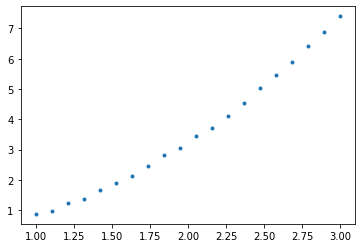

In [ ]:
#[Fictional Story] The astronauts on moon wanted to measure the value of gravity on the moon. The decide to throw a spanner 
#from different heights and measure the time needed to cover the distance and based on these values want to extract the value of 
#gravity on moon. The values might be slightly off due to human error and the (very thin) moon atmosphere. Use linear regression to 
#find the value of gravity on the moon.



import matplotlib.pyplot as plt
import numpy as np

gmoon=9.8/6
t=np.linspace(1,3,20)
s=0.5*gmoon*t**2 + 0.05*np.random.randn(t.size)
plt.plot(t,s,'.')
plt.show()

Real gmoon is 1.6333333333333335, the prediceted gmoon is 1.6281905379914081


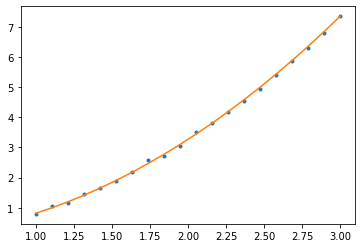

In [ ]:
# the easiest way is to use library
from sklearn.linear_model import LinearRegression

estimator = LinearRegression(fit_intercept=False)

inputs = 0.5 * t[:, None] ** 2
outputs = s[:, None]

estimator.fit(inputs, outputs)

gmoon_pred = estimator.coef_[0][0]

print(f"Real gmoon is {gmoon}, the prediceted gmoon is {gmoon_pred}")

pred_y = 0.5*gmoon*t**2
plt.plot(t,s,'.')
plt.plot(t,pred_y)
plt.show()

Real gmoon is 1.6333333333333335, the prediceted gmoon is [[1.62819054]]


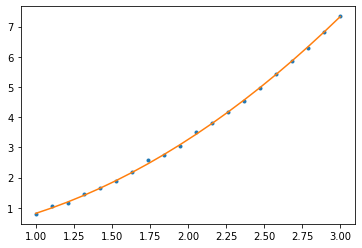

In [ ]:
# if we want to write by ourselves

# data list X: shape [N, n], (have N samples, each one has n values)
# target list Y: shape [N, 1], (have N samples, each one has 1 values)
# coefficient matrix A: [n, 1], (have n variable)

# in our case: N=len(t), n=1, A has only variable gmoon

# math theory: (@ is the matrix dot)
# pred_Y = X @ A
# mse = mean((pred_Y - Y)**2) 

# written in matrix
# mse = (X @ A - Y).T @ (X @ A - Y)
# d(mse)/d(A) = 2 * X.T @ (Y - X @ A)

# let d(mse)/d(A)==0, now we get the same equation in slides (p41)
# A = (X.T @ X) ** -1 @ X.T @ Y

# use the equation in slides (p41)
X = 0.5 * t[:, None] ** 2
Y = s[:, None]

pred_gmoon = (X.T @ X) ** -1 @ X.T @ Y
print(f"Real gmoon is {gmoon}, the prediceted gmoon is {pred_gmoon}")

pred_y = 0.5*pred_gmoon[0,0]*t**2
plt.plot(t,s,'.')
plt.plot(t,pred_y)
plt.show()